In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


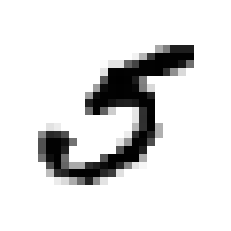

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sd = X[36000]
sd_image = sd.reshape(28,28)
plt.imshow(sd_image, cmap = matplotlib.cm.binary,
          interpolation = 'nearest')
plt.axis('off')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [25]:
# опознаем одну цифру 5 - двоичный классификатор 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [26]:
# Стохастический градиентный спуск SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict([sd])

array([ True])

In [28]:
# Кросс валидация 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([0.9679, 0.9254, 0.9663])

МАТРИЦА НЕТОЧНОСТЕЙ ДЛЯ КЛАССИФИКАТОРОВ

In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pr = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pr)

array([[52714,  1865],
       [  943,  4478]], dtype=int64)

In [36]:
# Расчет точности и полноты 
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pr), recall_score(y_train_5, y_train_pr))

0.7059750906511114 0.8260468548238332


In [37]:
# Мера F1 score - среднегармоническое плотности и точности 
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pr)

0.7613056783407003

In [38]:
# Выбор порога при помощи кросс валидации
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method = 'decision_function')

In [40]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
# Рисуем график функции порога от точности и плотности
def plot_precision_recall_vs_threshold(precisions,
                                       recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Точность')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Полнота')
    plt.xlabel('Порог')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    

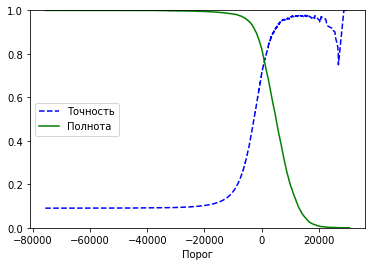

In [49]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()